In [ ]:
# forecast the sale for 1 year for the furniture products category on the basisi of historical data 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
pd.set_option("display.max_columns", None)
#Importing data
df = pd.read_excel('Sample - Superstore.xls',header=0)
#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.shape

(9994, 21)

## Properites of TS data
1. Single-Diementonal Data -> Subset only Time and Y 
2. Convert the time var as the index
3. sort the data in chronological order
4. Equally spaced time intervals -> ressample 
5. group the data on the date var 

In [3]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [4]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture.shape

(2121, 21)

In [9]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [5]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [10]:
furniture=furniture[["Order Date","Sales"]]
furniture.shape

(2121, 2)

In [11]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [12]:
furniture = furniture.sort_values('Order Date',ascending=True)


In [13]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [14]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [15]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [16]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [17]:
furniture = furniture.set_index('Order Date')

In [21]:
furniture.head(15)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [24]:
y = furniture['Sales'].resample("MS").mean()


In [25]:
print(y.shape)
y


(48,)


Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

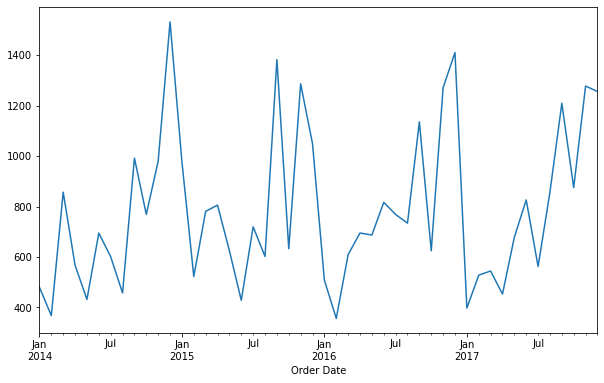

In [26]:
y.plot(figsize=(10, 6))
plt.show()

In [27]:
train=y.loc[:'2016-12-01']
train.tail()


Order Date
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [28]:

test=y.loc['2017-01-01':]
test.tail()

Order Date
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

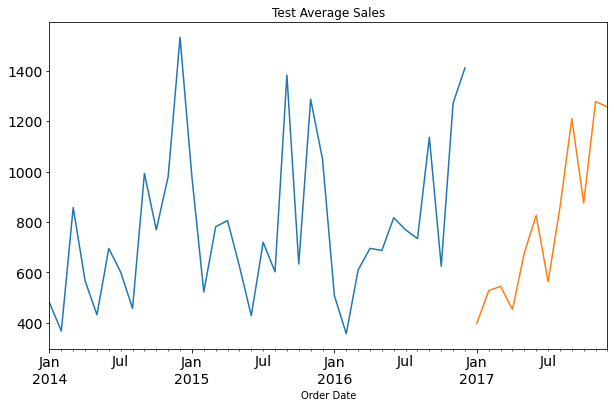

In [29]:
#Plotting data
train.plot(figsize=(10,6), title= 'Train Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Test Average Sales', fontsize=14)
plt.show()

## Time Series Models

### 1. Simple Average
- if your values are fluctuating in a range then you can use simple avg model but you will get stright line
- errors are high if the data is has high spikes 
- if the data has no spike then error is less 
- not suitable for real wold data
- it does not indeitify trends

### 2. Rolling Average
- when you need recent data but not the entire data for forecasting at that time you will use rolling avg
- you can decide the time window to calculate the rolling avg based on how much recent data you want to consider
- it identify trends 

### 3. Exponential Smoothing 
- if you want to give importance to historical data as well but more importantance to recent data then you can use Exponential
Smoothing 
- it add some weights to recent data and less weights to historical data thats how it indentify the data importance which give more accurate prediction.

    a. Simple Exponential Smoothing - 1st Order 
        - if the data has no trend and seasonality 
        - you will get a horizontal stright line 
    
    
    b. Holts Linear Trend Models - 2nd Order
        - if you have trend commponent in the data 
    
    
    3. Holt Winter Model - 3rd Order 
        - if you have trend commponent as well as seasonality in the data 
        - You have to mention the seasonality commponet in the argument like how many time period is repeating
        


## A. Simple Exponential Smoothing - 1st Order

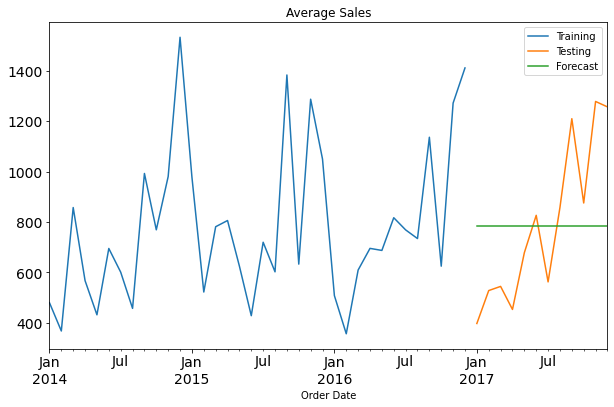

In [53]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()


#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp

fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.001) # TRY TO CHANGE VALUE FOR SMOOTHING AND SELECT THE BEST MODEL BASED ON AIC
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.legend(labels=["Training","Testing","Forecast"])
plt.show()

In [54]:
# AIC is  used to compare different models with same algo but different data/parameters
# choose models with the loweset AIC value
fit1.aic

415.5942255752052

In [55]:
# RMSE is used to compare different models with same data but different models
# Choose the model with Lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rms)

303.5090576334869


- Season Decomposition allows is brake down data into 4 major components
    1. Observed Values
    2. Trend Values
    3. Season Values
    4. Residual Values

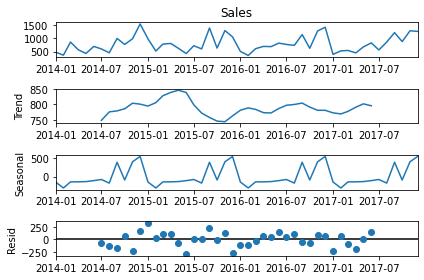

In [56]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

## B. Holts Linear Trend Models - 2nd Order

C:\Users\Dev\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  """


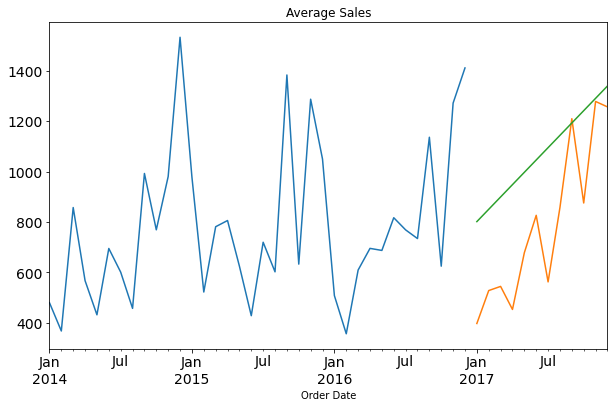

In [64]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
 
#soothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.05,smoothing_slope = 0.75)
Holt_df['Holt_linear'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
# plt.legend(labels=["Training","Testing","Forecast-Holt_Linear"])
plt.show()

In [65]:
fit1.aic

425.8874394456575

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rms)

328.2795151227414


## C. Holt Winter Model - 3rd Order 

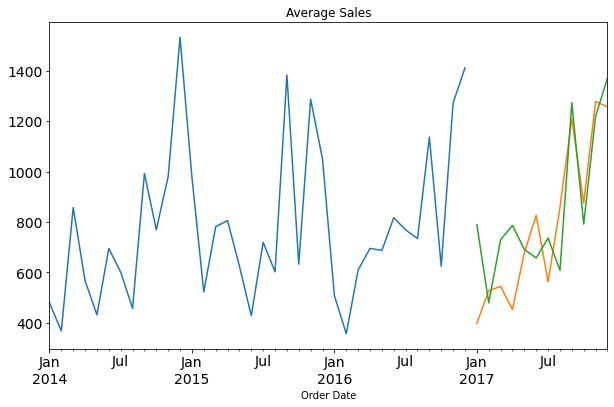

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma

# two type of trend and season component
# 1. additive: if the data is constant and not exponentially increased then use add
# 2. multiplicative : if data is not condstant and exponentially increased the use mul

fit1 = ExponentialSmoothing(train ,
                            seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()

Holt_Winter_df['Holt_Winter'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [68]:
fit1.aic

392.3907330974735

In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

193.711355430416


## ARIMA

1. AR -> Auto Regrecive 
2. MA -> Moving Average 
3. ARMA -> AR + MA
4. I -> Integrated 
5. ARIMA -> AR + I + MA (NON Seasonal) Auto Regrecive Integrated Moving Aaverage 
6. SARIMA -> Seasonal data

In [ ]:
# H0--->Data is non stationary
# H1--> Data is stationary
#Since pvalue<0.05, we reject the H0
#Our data is stationary.

In [71]:
#checking stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic:',result[0])
print('p-value: %f' %result[1])


ADF Statistic: -5.191070187339275
p-value: 0.000009


In [ ]:
"""
f=y.diff( periods= 1)
f.plot(figsize=(10, 6))
plt.show()
"""

In [ ]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

In [ ]:
#p+q+P+Q<=10
#p+q<=3

In [72]:
import pmdarima as pm
# pip install pmdarima

In [73]:

model = pm.auto_arima(y,
                      start_p=0, 
                      max_p=3, 
                      d=None, 
                      max_d=2,
                      start_q=0, 
                      max_q=3,  
                      start_P=0,
                      max_P=3, 
                      D=None, 
                      max_D=2, 
                      start_Q=0, 
                      max_Q=3,
                      max_order=10, 
                      m=12, 
                      seasonal=True, 
                      information_criterion='aic',
                      test='adf',
                      trace=True,
                      random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.10 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.10 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.04 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.12 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.06 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.14 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.41 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=0.79 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.26 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [74]:
model

ARIMA(order=(3, 2, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [75]:
model.aic()

489.41762612467454

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
                order=(3, 2, 0),seasonal_order=(1,1,0,12)).fit()


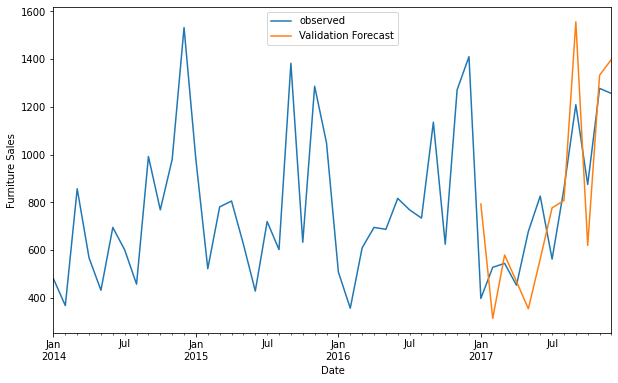

In [77]:
pred = model.get_prediction(start=pd.to_datetime('2017-01-01'))
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [78]:
pred.predicted_mean

Order Date
2017-01-01     792.949433
2017-02-01     314.265634
2017-03-01     579.803142
2017-04-01     468.932403
2017-05-01     354.687213
2017-06-01     562.948853
2017-07-01     777.172664
2017-08-01     807.929695
2017-09-01    1556.342076
2017-10-01     620.158820
2017-11-01    1332.648312
2017-12-01    1399.290962
Freq: MS, Name: predicted_mean, dtype: float64

In [79]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-01':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)


230.06285192625634


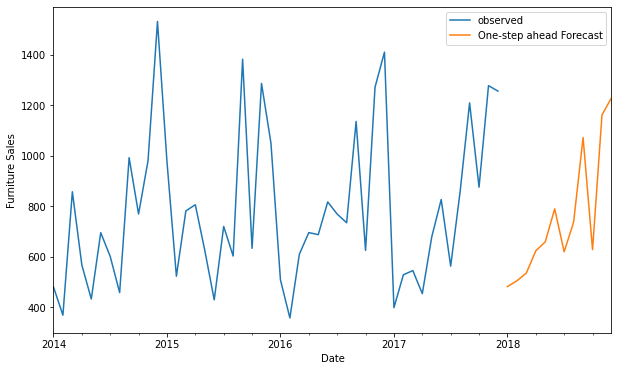

In [80]:
pred_uc = model.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [81]:
Y_predictions=pred_uc.predicted_mean
Y_predictions

2018-01-01     481.175775
2018-02-01     504.162658
2018-03-01     534.896797
2018-04-01     623.058220
2018-05-01     658.537426
2018-06-01     789.387647
2018-07-01     619.269484
2018-08-01     736.930488
2018-09-01    1072.136389
2018-10-01     627.864066
2018-11-01    1161.662847
2018-12-01    1229.291110
Freq: MS, Name: predicted_mean, dtype: float64

In [82]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx",index=True)

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = pd.DataFrame()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
#test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [ ]:
Holt_Winter_df['Holt_Winter']

In [ ]:
Holt_Winter_df['Holt_Winter'].to_excel("Holt-Winter Predictions.xlsx")